Імпортування необхідних бібліотек та модулів

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Шляхи до тренувальних та тестових даних

In [20]:
# Шляхи до тренувальних та тестових даних
base_dir = "C:/Users/Lenovo/Desktop/study/data science/Lab9_dataset"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Категорії класів (види рису)
categories = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]

# Перевірка кількості зображень у кожній папці
for dataset_type in ["train", "test"]:
    print(f"\nПеревіряємо {dataset_type}...")
    for category in categories:
        path = os.path.join(base_dir, dataset_type, category)
        num_images = len(os.listdir(path))
        print(f"{category}: {num_images} зображень")



Перевіряємо train...
Arborio: 100 зображень
Basmati: 100 зображень
Ipsala: 100 зображень
Jasmine: 100 зображень
Karacadag: 100 зображень

Перевіряємо test...
Arborio: 20 зображень
Basmati: 20 зображень
Ipsala: 20 зображень
Jasmine: 20 зображень
Karacadag: 20 зображень


Реалізація моделі CNN

Found 500 images belonging to 5 classes.
Found 100 images belonging to 5 classes.

Приклади зображень з навчального набору:


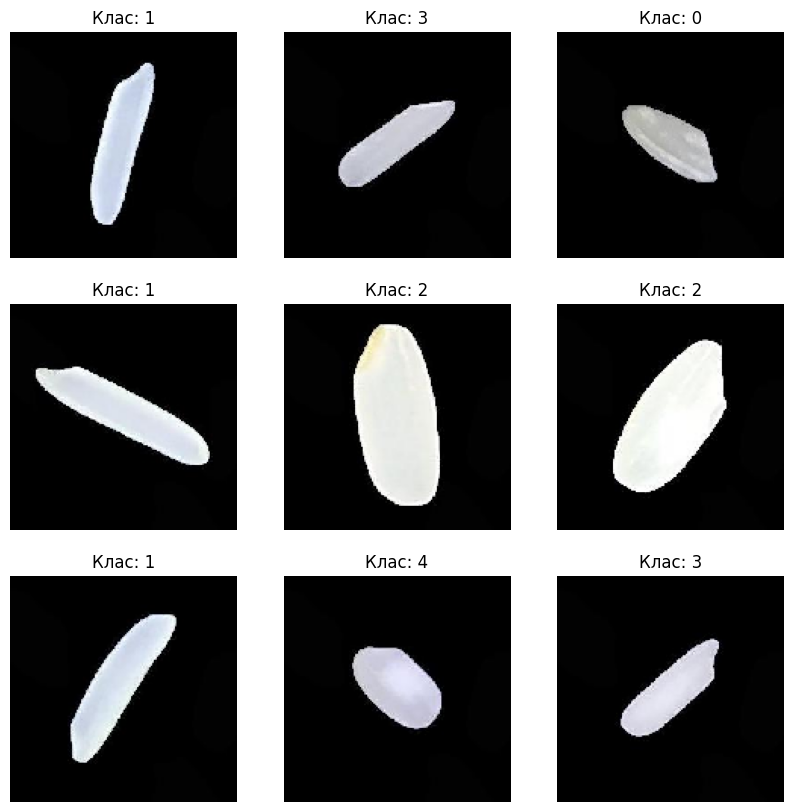

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,997 (18.42 MB)

 Trainable params: 4,828,997 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Підготовка даних
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Завантаження даних
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Багатокласова класифікація
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Візуалізація кількох зображень із набору даних
def plot_sample_images(data):
    images, labels = next(data)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(f"Клас: {np.argmax(labels[i])}")
        plt.axis('off')
    plt.show()

print("\nПриклади зображень з навчального набору:")
plot_sample_images(train_data)

# Побудова моделі CNN
model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(categories), activation='softmax')  # Вихідний шар з 5 класами
])

# Компіляція моделі
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Виведення структури моделі
model.summary()

Тренування та тестування моделі

Навчання моделі

In [22]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)


Epoch 1/10


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 245ms/step - accuracy: 0.3514 - loss: 1.4405 - val_accuracy: 0.9000 - val_loss: 0.3489
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - accuracy: 0.8039 - loss: 0.4685 - val_accuracy: 0.9100 - val_loss: 0.2020
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - accuracy: 0.9006 - loss: 0.2323 - val_accuracy: 0.9300 - val_loss: 0.1758
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.9393 - loss: 0.1705 - val_accuracy: 0.9500 - val_loss: 0.1377
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 241ms/step - accuracy: 0.9614 - loss: 0.1257 - val_accuracy: 0.9500 - val_loss: 0.0942
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.9522 - loss: 0.1020 - val_accuracy: 0.9800 - val_loss: 0.0519
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.9698 - loss: 0.0897 - val_accuracy: 0.9800 - val_loss: 0.0409
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - accuracy: 0.9769 - loss: 0.0634 - val_accuracy: 0.9700 - val_

Візуалізація результатів навчання

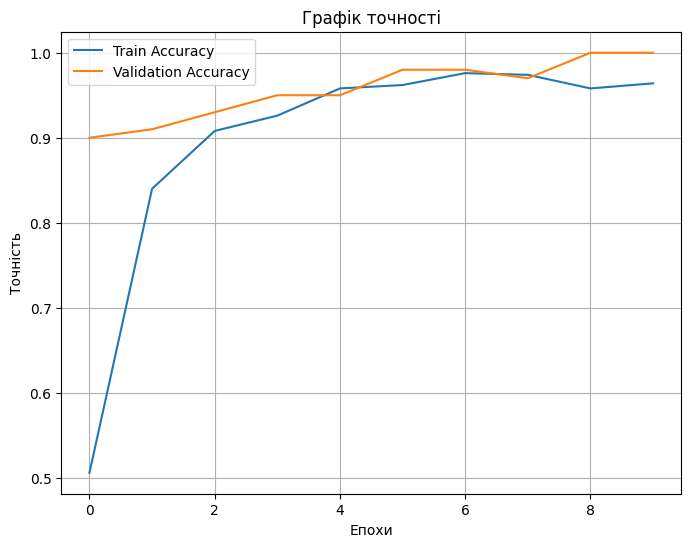

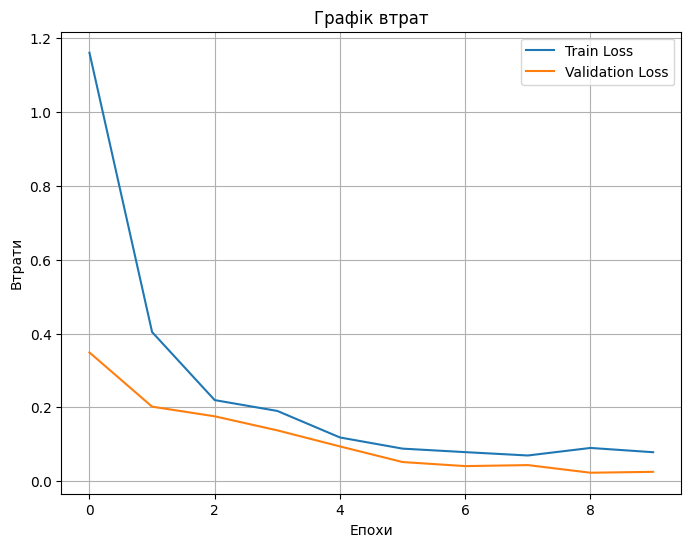

In [23]:
# Графік точності
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Графік точності')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.grid()
plt.show()

# Графік втрат
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Графік втрат')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.grid()
plt.show()

Оцінка результатів

In [24]:
# Передбачення на тестовому наборі
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

# Звіт про класифікацію
print("\nЗвіт про класифікацію:")
print(classification_report(y_true, y_pred_classes, target_names=categories))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

Звіт про класифікацію:
              precision    recall  f1-score   support

     Arborio       0.25      0.25      0.25        20
     Basmati       0.15      0.15      0.15        20
      Ipsala       0.25      0.25      0.25        20
     Jasmine       0.35      0.35      0.35        20
   Karacadag       0.25      0.25      0.25        20

    accuracy                           0.25       100
   macro avg       0.25      0.25      0.25       100
weighted avg       0.25      0.25      0.25       100



Матриця плутанини


Матриця плутанини:
[[5 3 5 5 2]
 [7 3 3 1 6]
 [3 6 5 2 4]
 [2 6 2 7 3]
 [3 2 5 5 5]]


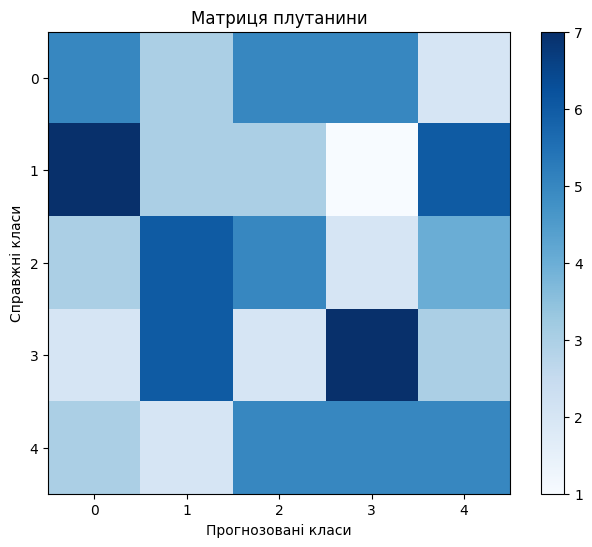

In [25]:
print("\nМатриця плутанини:")
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Матриця плутанини')
plt.xlabel('Прогнозовані класи')
plt.ylabel('Справжні класи')
plt.show()
